# Computer Infrastructure Tasks

## Task 1: Create Directory Structure
Used the `mkdir` command to create the required directories, followed by `cd` and `ls` to navigate and confirm the structure. Task was straightforward due to previous familiarity with these commands.

**Reference:** [Linux `mkdir` Command](https://linuxize.com/post/how-to-create-directories-in-linux-using-the-mkdir-command/)

## Task 2: Timestamps
Navigated to the `data/timestamps` directory and used the `date >> now.txt` command to append the current date and time to the file `now.txt`. Since I was not familiar with the `date` command, I followed instructions from Ian’s GitHub page. The `more` command was used to verify the content of `now.txt`, this command reads and prints content to the command line. While I attempted to automate the process of appending the date ten times, I couldn't find a method to do so efficiently so this part was done by running the command ten times in the command line, useful to note the up arrow retreives the most recently run command.

**Reference:** [Linux `date` Command](https://linuxize.com/post/linux-date-command/)

## Task 3: Formatting Timestamps
This task initially proved difficult as I struggled to acheive the correct formatting syntax for the `date` command. However, after reading the `man date` page plus some trial and error, the initial overuse of field descriptors was corrected and `date +"%Y%m%d_%H%M%S" >> formatted.txt` was used to format the timestamps and append them to `formatted.txt`.

**Reference:** [Linux `date` Format Options](https://www.cyberciti.biz/faq/linux-unix-formatting-dates-for-display/)

## Task 4: Create Timestamped Files
This task revolved around command substitution. After some research, I discovered the `$()` syntax is assumed to be best practice over backticks, which allowed me to embed the `date` command into the `touch` command. The correct command, `touch $(date +"%Y%m%d_%H%M%S").txt`, created a text file with `touch` and then input the timestamp `$(date +"%Y%m%d_%H%M%S")` as the file name successfully. This task followed very naturally on from the previous task.

**References:** 
- [Command Substitution using `$()`](https://tldp.org/LDP/abs/html/commandsub.html)
- [Substitution Best Practice](https://mywiki.wooledge.org/BashFAQ/082)

## Task 5: Download Today’s Weather Data
I initially encountered challenges with the `wget` command, which is not included in Windows by default and is relatively cumbersome to get working. Instead of installing it locally, I used Codespaces, where `wget` is pre-installed. Upon looking at the manual, I settled on the command `wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today`. This worked at downloading the weather data in JSON format to the current directory `data/weather`.

**Reference:** [Linux `wget` Command](https://www.gnu.org/software/wget/manual/wget.html)

## Task 6: Timestamp the Data
This task required me to combine `wget` from task 5 with the `$()` operator from Task 4. `wget -O $(date +"%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today` was used to successfully save the weather data with a timestamped filename.

**Reference:** [Linux `wget` with Filename Options](https://www.tecmint.com/download-multiple-files-with-wget-in-linux/)

## Task 7: Write the Script
Coming into this task I was completely unfamiliar with shell scripting, I first referred to resources such as [FreeCodeCamp](https://www.freecodecamp.org/news/shell-scripting-crash-course-how-to-write-bash-scripts-in-linux/) and [CloudXLab](https://cloudxlab.com/assessment/displayslide/63/writing-first-shell-script) to learn the basics. 

I followed the freeCodeCamp tutorial to get started. The first thing I did was use the `which bash` command to locate my bash shell path, which returned `/usr/bin/bash`. I added this as the first line of my script to ensure it would run correctly. This shell might differ if running the script outside of Codespaces, such as on Windows.

Initially, my script didn’t work because I hadn’t correctly initialized the shell. I learned that the `#!/usr/bin/bash` line, known as a shebang, is crucial as it specifies which shell program should interpret the rest of the file. [StackOverflow](https://stackoverflow.com/questions/42971986/what-does-operator-mean-in-linux) was helpful in clarifying this.

I then added the `wget -O $(date +"%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today` command from the previous task into my script. This successfully pulled the weather data and named the file using a timestamp, but the file was saved in the root directory instead of `data/weather`.

To fix this, I researched the use of `-P` in `wget`, which allows specifying a directory to save the file. I tried modifying the command to `wget -O $(date +"%Y%m%d_%H%M%S").json -P /workspaces/computer_infrastructure/data/weather`, but the file was still saved in the root directory. 

In this type of command the -O and -P operators can have a conflict when used simultaneously, I have included both the original command and the amended correct command in the shell script for your reference.

The final command `wget -O /workspaces/computer_infrastructure/data/weather/$(date +"%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today` does the same as the above but saves the weather JSON file into the correct directory. The script is now working as intended.

For installing `wget` on Windows, I found the [GnuWin32 project](https://sourceforge.net/projects/gnuwin32/files/) to be a good resource.

To format my `README` notes for this document [GPT](https://chat.openai.com/chat) was used as an aide.   

**References:**
- [FreeCodeCamp Bash Scripting Guide](https://www.freecodecamp.org/news/shell-scripting-crash-course-how-to-write-bash-scripts-in-linux/)
- [How to Set the Destination Folder for Wget](https://unix.stackexchange.com/questions/307322/how-to-set-the-destination-folder-for-wget)
- [Shebang Explanation](https://stackoverflow.com/questions/42971986/what-does-operator-mean-in-linux)

## Task 9: pandas
Exploration of the JSON data downloaded by `weather.sh`. This dataset contains weather data for Athenry, Co.Galway. A weather report is recorded every hour on the hour and is included as a row in the data set. The variables or columns in the data set include the following:

- name: The location of the weather station.
- temperature: The temperature recorded (Celsius).
- symbol: A code representing a weather condition symbol (e.g. 02n would be a night version of "few clouds" - [Symbols](https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)).
- weatherDescription: A basic description of the weather (e.g. "Fair").
- text: A basic description of the weather (e.g. "Fair") but in string format.
- windSpeed: The speed of the wind (km/h).
- windGust: The maximum wind gust recorded (km/h).
- cardinalWindDirection: The direction of the wind (e.g. E for east).
- windDirection: The wind direction (in degrees).
- humidity: The relative humidity (as a %).
- rainfall: The amount of rainfall recorded (mm).
- pressure: The atmospheric pressure (hectopascals or millibars).
- dayName: The day of the week the data was recorded.
- date: The date the data was recorded.
- reportTime: The time at which the data was recorded.


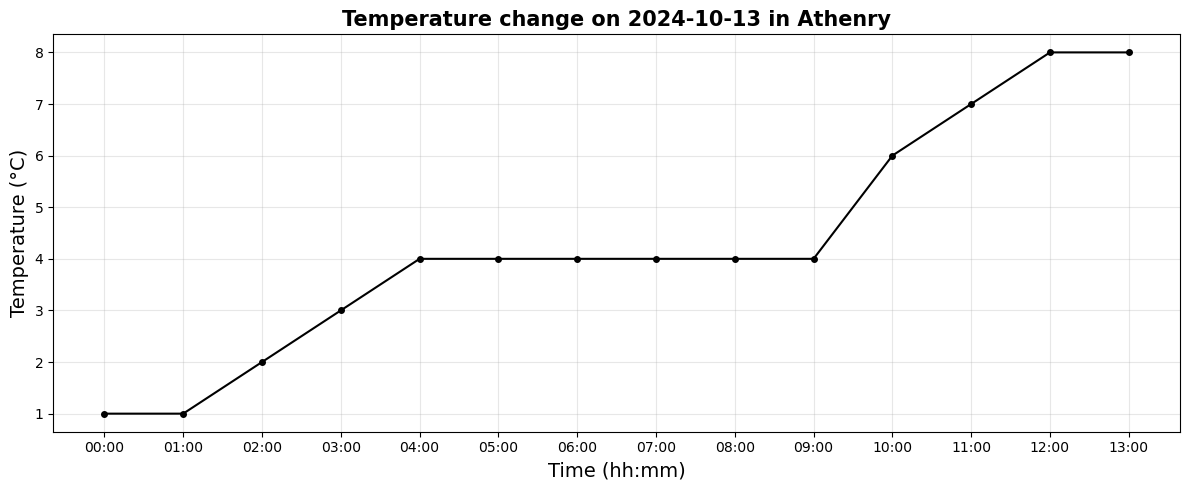

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace the string in the read_json method to the file you want to read.
file_path = "data/weather/20241013_130200.json"
df = pd.read_json(file_path)

# String manipulation to ensure different versions/dates of these files are represented clearly in the plot title.
date_string = file_path.split("/")[-1].split("_")[0]
formatted_date_string = f"{date_string[:4]}-{date_string[4:6]}-{date_string[6:]}"

#df # Shows dataframe
#df.describe() # Describes some basic statistics.
#df.isnull().sum() # There are no missing values on this df.

plt.figure(figsize=(12,5))
plt.plot(df["reportTime"], df["temperature"], color='black', marker="o", markersize=4)

plt.title(f"Temperature change on {formatted_date_string} in Athenry", fontsize=15, fontweight="bold")
plt.xlabel("Time (hh:mm)", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()

In [2]:
df 

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,1,02n,Fair,"""Fair""",2,-,E,90,95,0,1016,Sunday,2024-10-13,00:00
1,Athenry,1,02n,Fair,"""Fair""",4,-,SW,225,96,0,1017,Sunday,2024-10-13,01:00
2,Athenry,2,04n,Cloudy,"""Cloudy""",2,-,E,90,96,0,1016,Sunday,2024-10-13,02:00
3,Athenry,3,04n,Cloudy,"""Cloudy""",2,-,SW,225,97,0,1017,Sunday,2024-10-13,03:00
4,Athenry,4,04n,Cloudy,"""Cloudy""",4,-,S,180,95,0,1017,Sunday,2024-10-13,04:00
5,Athenry,4,04n,Cloudy,"""Cloudy""",6,-,E,90,94,0,1017,Sunday,2024-10-13,05:00
6,Athenry,4,04n,Cloudy,"""Cloudy""",7,-,E,90,93,0,1017,Sunday,2024-10-13,06:00
7,Athenry,4,04n,Cloudy,"""Cloudy""",9,-,E,90,91,0,1017,Sunday,2024-10-13,07:00
8,Athenry,4,04d,Cloudy,"""Cloudy""",9,-,E,90,93,0,1017,Sunday,2024-10-13,08:00
9,Athenry,4,04d,Cloudy,"""Cloudy""",7,-,E,90,89,0,1017,Sunday,2024-10-13,09:00
